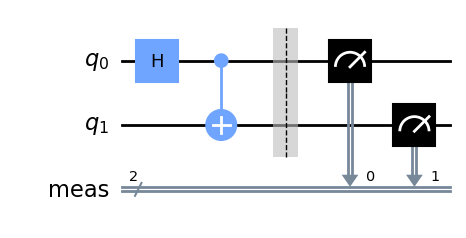

TypeError: cannot pickle 'qiskit_aer.backends.controller_wrappers.AerCircuit' object

In [14]:
#-------------------------------------------------------------------------
# Quantum Error Mitigation 
# Chapter 4 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import numpy as np
from qiskit.visualization import circuit_drawer

from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
#-------------------------------------------------------------------------

# Create a quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Draw the circuits
display(circuit_drawer(qc, output='mpl', style="iqp"))

# Define noise model
noise_model = NoiseModel()

# Add 1-qubit depolarizing error to single-qubit gates
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['h'])

# Add 2-qubit depolarizing error to the 'cx' gate
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 2), ['cx'])

# Simulate with noise
simulator = Aer.get_backend('aer_simulator')
result = execute(qc, simulator, noise_model=noise_model).result()

# Apply error mitigation
# Pass a list of qubit indices instead of an integer
cal_circuits, state_labels = complete_meas_cal(qubit_list=[0, 1], qr=qc.qregs[0])
meas_fitter = CompleteMeasFitter(result, state_labels)
mitigated_result = meas_fitter.filter.apply(result)

print("Mitigated Result:", mitigated_result.get_counts())

